In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# read the data
df = pd.read_csv("C:/Users/AHMED KHAN/Desktop/Project_Refined.csv")

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (16,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1032375, 37)
PrimaryKey                        int64
CallConfirmedDT                  object
ShiftDay                         object
TourOfShift                       int64
IncidentFirstDue                float64
InitialIncidentType              object
DispatchedIncidentType           object
ArrivedIncidentType              object
FinalIncidentType                object
FinalIncidentTypeDescription     object
MutualAidReceived                  bool
ResponseUnitID                   object
TransportUnitID                  object
TransportUnitLOC                 object
UnitPrimaryActionTaken           object
UnitOtherActionsTaken            object
UnitStation                      object
UnitType                         object
UnitArrivalOrder                float64
UnitTransportedDT                object
UnitTransportedArrivalDT         object
PersonnelID                      object
PersonnelRole                    object
TransportLOC                     object
TransportHospitalCode     

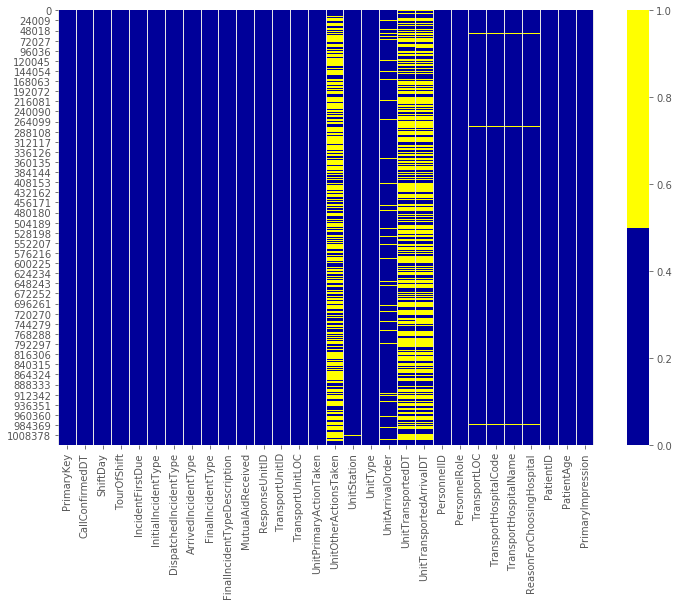

In [3]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [4]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PrimaryKey - 0.0%
CallConfirmedDT - 0.0%
ShiftDay - 0.0%
TourOfShift - 0.0%
IncidentFirstDue - 0.0%
InitialIncidentType - 0.0%
DispatchedIncidentType - 0.0%
ArrivedIncidentType - 0.0%
FinalIncidentType - 0.0%
FinalIncidentTypeDescription - 0.0%
MutualAidReceived - 0.0%
ResponseUnitID - 0.0%
TransportUnitID - 0.0%
TransportUnitLOC - 0.0%
UnitPrimaryActionTaken - 0.0%
UnitOtherActionsTaken - 62.0%
UnitStation - 0.0%
UnitType - 0.0%
UnitArrivalOrder - 9.0%
UnitTransportedDT - 57.0%
UnitTransportedArrivalDT - 58.0%
PersonnelID - 0.0%
PersonnelRole - 0.0%
TransportLOC - 0.0%
TransportHospitalCode - 0.0%
TransportHospitalName - 0.0%
ReasonForChoosingHospital - 0.0%
PatientID - 0.0%
PatientAge - 0.0%
PrimaryImpression - 0.0%
SecondaryImpression - 0.0%
PatientDisposition - 0.0%
ProcedurePrimaryKey - 22.0%
ProcedurePerformed - 22.0%
MedicationPrimaryKey - 46.0%
MedicationGiven - 46.0%
isALS_LOC - 0.0%


created missing indicator for: IncidentFirstDue
created missing indicator for: ArrivedIncidentType
created missing indicator for: FinalIncidentTypeDescription
created missing indicator for: UnitPrimaryActionTaken
created missing indicator for: UnitOtherActionsTaken
created missing indicator for: UnitStation
created missing indicator for: UnitArrivalOrder
created missing indicator for: UnitTransportedDT
created missing indicator for: UnitTransportedArrivalDT
created missing indicator for: PersonnelID
created missing indicator for: PersonnelRole
created missing indicator for: TransportLOC
created missing indicator for: TransportHospitalCode
created missing indicator for: TransportHospitalName
created missing indicator for: ReasonForChoosingHospital
created missing indicator for: PatientID
created missing indicator for: PatientAge
created missing indicator for: PrimaryImpression
created missing indicator for: SecondaryImpression
created missing indicator for: PatientDisposition
created mi

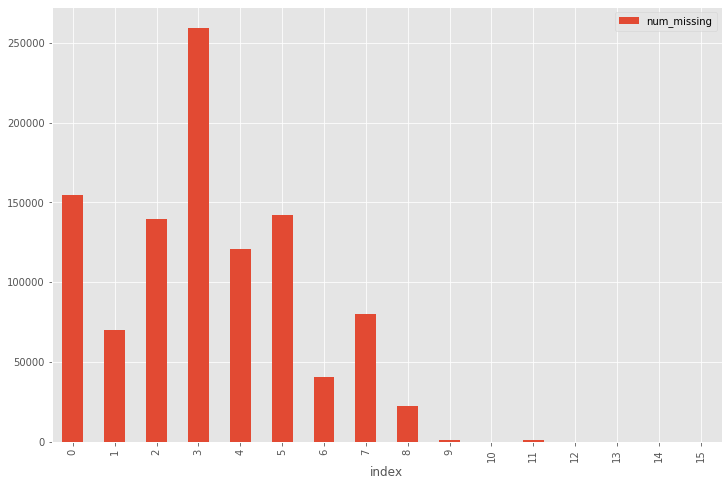

In [5]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')